In [7]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
#download mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#訓練データの前処理
x_train=x_train.reshape(60000,28,28,1)
x_train=x_train.astype("float32")
x_train=x_train/255
y_train=to_categorical(y_train,num_classes=10)
#テストデータの処理
x_test=x_test.reshape(10000,28,28,1)
x_test=x_test.astype("float32")
x_test=x_test/255
y_test=to_categorical(y_test,num_classes=10)

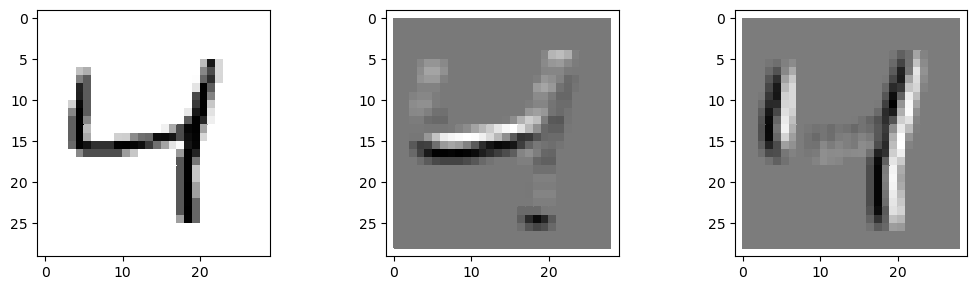

In [8]:
import matplotlib.pyplot as plt
#filterの準備
myfil1=np.array([[1,1,1],
                 [1,1,1],
                 [-2,-2,-2]],dtype=float)
myfil2=np.array([[-2,1,1],
                 [-2,1,1],
                 [-2,1,1]],dtype=float)
#入力画像の準備
id_img=2#使用画像のインデックス
x_img=x_train[id_img,:,:,0]
img_h=28
img_w=28
x_img=x_img.reshape(img_h,img_w)#入力画像
out_img1=np.zeros_like(x_img)#myfil1の出力用の行列を準備
out_img2=np.zeros_like(x_img)#myfil2の出力用行列を準備
#フィルター処理
for ih in range(img_h-3+1):
    for iw in range(img_w-3+1):
        img_part=x_img[ih:ih+3,iw:iw+3]
        out_img1[ih+1,iw+1]\
            =img_part.reshape(-1)@myfil1.reshape(-1)
        out_img2[ih+1,iw+1]\
            =img_part.reshape(-1)@myfil2.reshape(-1)
#表示
plt.figure(figsize=(12,3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
#元画像
plt.subplot(1,3,1)
plt.pcolor(1-x_img)
plt.xlim(-1,29)
plt.ylim(29,-1)
#myfil1の適用
plt.subplot(1,3,2)
plt.pcolor(-out_img1)
plt.xlim(-1,29)
plt.ylim(29,-1)
#myfil2の適用
plt.subplot(1,3,3)
plt.pcolor(-out_img2)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.show()

In [9]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Dropout,Flatten,Dense
import time

tensorflow.random.set_seed(seed=1)
#modelの定義
model=Sequential()
model.add(
    Conv2D(
        filters=8,kernel_size=(3,3),
        padding="same",input_shape=(28,28,1),
        activation="relu",
    )
)
model.add(Flatten())
model.add(Dense(units=10,activation="softmax"))
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",metrics=["accuracy"],
)
#learning
start_time=time.time()
history=model.fit(
    x_train,y_train,
    batch_size=1000,epochs=20,verbose=1,
    validation_data=(x_test,y_test),
)
score=model.evaluate(x_test,y_test,verbose=0)
calculation_time=time.time()-start_time
#result
print(f"Test loss:{score[0]:.4f}")
print(f"Test accuracy:{score[1]:.4f}")
print(f"Calculation time:{calculation_time:.2f}sec")


Epoch 1/20
60/60 [==============================] - 6s 89ms/step - loss: 0.8332 - accuracy: 0.7976 - val_loss: 0.3481 - val_accuracy: 0.9052
Epoch 2/20
60/60 [==============================] - 5s 84ms/step - loss: 0.3181 - accuracy: 0.9097 - val_loss: 0.2761 - val_accuracy: 0.9243
Epoch 3/20
60/60 [==============================] - 5s 86ms/step - loss: 0.2628 - accuracy: 0.9265 - val_loss: 0.2366 - val_accuracy: 0.9354
Epoch 4/20
60/60 [==============================] - 5s 85ms/step - loss: 0.2269 - accuracy: 0.9373 - val_loss: 0.2064 - val_accuracy: 0.9420
Epoch 5/20
60/60 [==============================] - 6s 96ms/step - loss: 0.1983 - accuracy: 0.9452 - val_loss: 0.1852 - val_accuracy: 0.9490
Epoch 6/20
60/60 [==============================] - 6s 97ms/step - loss: 0.1732 - accuracy: 0.9530 - val_loss: 0.1621 - val_accuracy: 0.9550
Epoch 7/20
60/60 [==============================] - 5s 88ms/step - loss: 0.1545 - accuracy: 0.9579 - val_loss: 0.1464 - val_accuracy: 0.9588
Epoch 8/20
60

In [10]:
import numpy as np
def show_prediction():
    #testdataに対する出力を計算
    n_show=96
    y=model.predict(x_test[:n_show,:])
    #結果の描画
    plt.figure(figsize=(12,8))#表示画像の大きさ
    for i in range(n_show):
        x=x_test[i,:]
        x=x.reshape(28,28)#一文字のピクセル数
        prediction=np.argmax(y[i,:])#y[行固定,列（０～９）]
        plt.subplot(8,12,i+1)#iはゼロから始まるから！
        plt.gray()
        plt.pcolor(1-x)#入力画像の表示（白黒反転）
        plt.text(22,25.5,f"{prediction}",fontsize=12)
        if prediction!=np.argmax(y_test[i,:]):
            plt.plot(
                [0,27],[1,1],"cornflowerblue",linewidth=5
            )
        plt.xlim(0,27)
        plt.ylim(27,0)
        plt.xticks([],"")
        plt.yticks([],"")


3/3 [==============================] - 0s 8ms/step


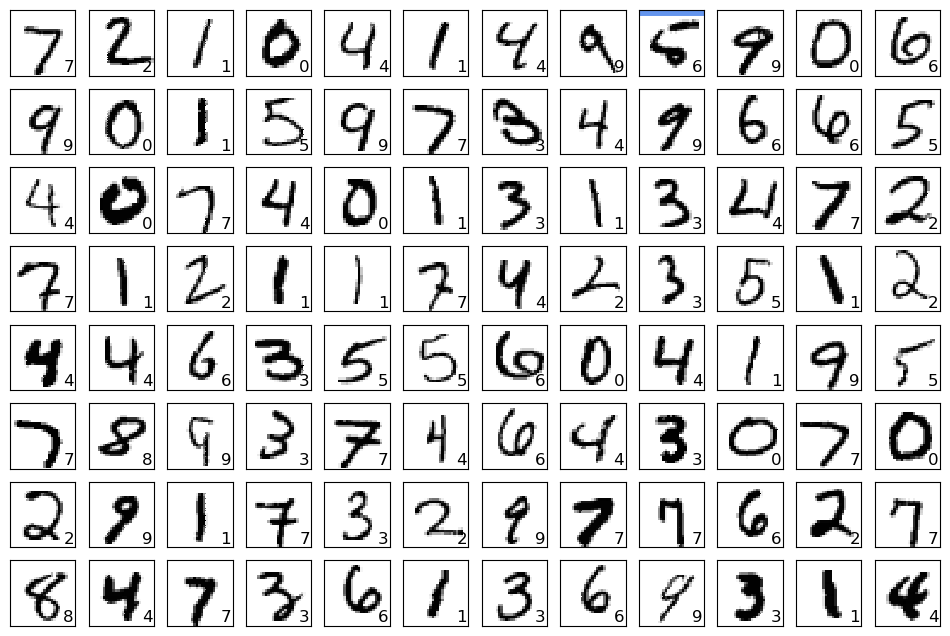

In [11]:
show_prediction()
plt.show()

In [12]:
ws=model.layers[0].get_weights()[0]
np.shape(ws)

(3, 3, 1, 8)

In [13]:
for i in range(8):
    print(i)

0
1
2
3
4
5
6
7


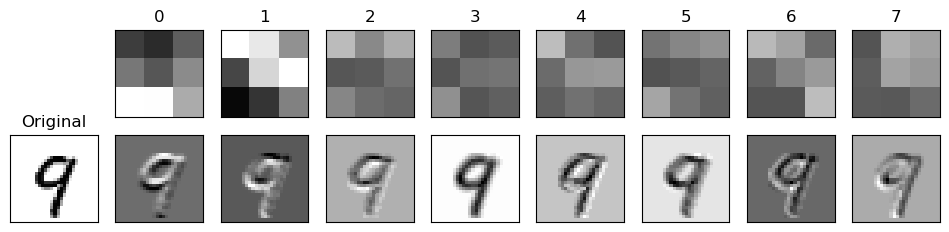

In [14]:
plt.figure(figsize=(12,2.5))
plt.subplots_adjust(wspace=0.2,hspace=0.2)

#入力画像(original)の表示
id_img=12#使用する画像のインデックス
x_img=x_test[id_img,:,:,0]
img_h,img_w=28,28
x_img=x_img.reshape(img_h,img_w)
plt.subplot(2,9,10)
plt.gray()
plt.pcolor(-x_img)
plt.title("Original")
plt.xlim(0,img_h)
plt.ylim(img_w,0)
plt.xticks([],"")
plt.yticks([],"")
#フィルターとフィルター処理した画像の表示
ws=model.layers[0].get_weights()[0]#(A)フィルターの重み取得
max_w,min_w=np.max(ws),np.min(ws)#重みの最大値最小値
for i in range(8):
    #フィルターの準備
    w=ws[:,:,0,i]
    w=w.reshape(3,3)
    #フィルターの表示
    plt.subplot(2,9,i+2)
    plt.pcolor(-w,vmin=min_w,vmax=max_w)
    plt.xlim(0,3)
    plt.ylim(3,0)
    plt.xticks([],"")
    plt.yticks([],"")
    plt.title(f"{i}")
    #フィルター処理した画像の作成
    out_img=np.zeros_like(x_img)
    for ih in range(img_h-3+1):#フィルター処理
        for iw in range(img_w-3+1):
            img_part=x_img[ih:ih+3,iw:iw+3]
            out_img[ih+1,iw+1]=\
                img_part.reshape(-1)@w.reshape(-1)
    #フィルター処理した画像の表示
    plt.subplot(2,9,i+11)
    plt.pcolor(-out_img)
    plt.xlim(0,img_w)
    plt.ylim(img_h,0)
    plt.xticks([],"")
    plt.yticks([],"")
plt.show()

NNにおいて層を重ねたとき畳み込みのフィルターと出力の違いに気を付けること！

In [20]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
import time

tensorflow.random.set_seed(seed=1)
#modelの定義
model=Sequential()
model.add(
    Conv2D(
        filters=16,kernel_size=(3,3),
        input_shape=(28,28,1),activation="relu",
    )
)
model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(units=128,activation="relu"))
model.add(Dropout(rate=0.25))
model.add(Dense(units=10,activation="softmax"))
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",metrics=["accuracy"],
)

#learning
start_time=time.time()
history=model.fit(
    x_train,y_train,
    batch_size=1000,epochs=20,verbose=1,
    validation_data=(x_test,y_test),
    )
score=model.evaluate(x_test,y_test,verbose=0)
calculation_time=time.time()-start_time

#result
print(score)
print(f"Test loss:{score[0]:.4f}")
print(f"Test accuracy:{score[1]:.4f}")
print(f"Calculationb time:{calculation_time:.2f}sec")

Epoch 1/20
60/60 [==============================] - 37s 615ms/step - loss: 0.7260 - accuracy: 0.7861 - val_loss: 0.1468 - val_accuracy: 0.9557
Epoch 2/20
60/60 [==============================] - 35s 590ms/step - loss: 0.1495 - accuracy: 0.9541 - val_loss: 0.0716 - val_accuracy: 0.9785
Epoch 3/20
60/60 [==============================] - 36s 595ms/step - loss: 0.0973 - accuracy: 0.9710 - val_loss: 0.0516 - val_accuracy: 0.9841
Epoch 4/20
60/60 [==============================] - 36s 597ms/step - loss: 0.0737 - accuracy: 0.9778 - val_loss: 0.0399 - val_accuracy: 0.9869
Epoch 5/20
60/60 [==============================] - 36s 595ms/step - loss: 0.0617 - accuracy: 0.9814 - val_loss: 0.0336 - val_accuracy: 0.9892
Epoch 6/20
60/60 [==============================] - 34s 568ms/step - loss: 0.0523 - accuracy: 0.9834 - val_loss: 0.0306 - val_accuracy: 0.9893
Epoch 7/20
60/60 [==============================] - 30s 492ms/step - loss: 0.0458 - accuracy: 0.9855 - val_loss: 0.0284 - val_accuracy: 0.9899

3/3 [==============================] - 0s 10ms/step


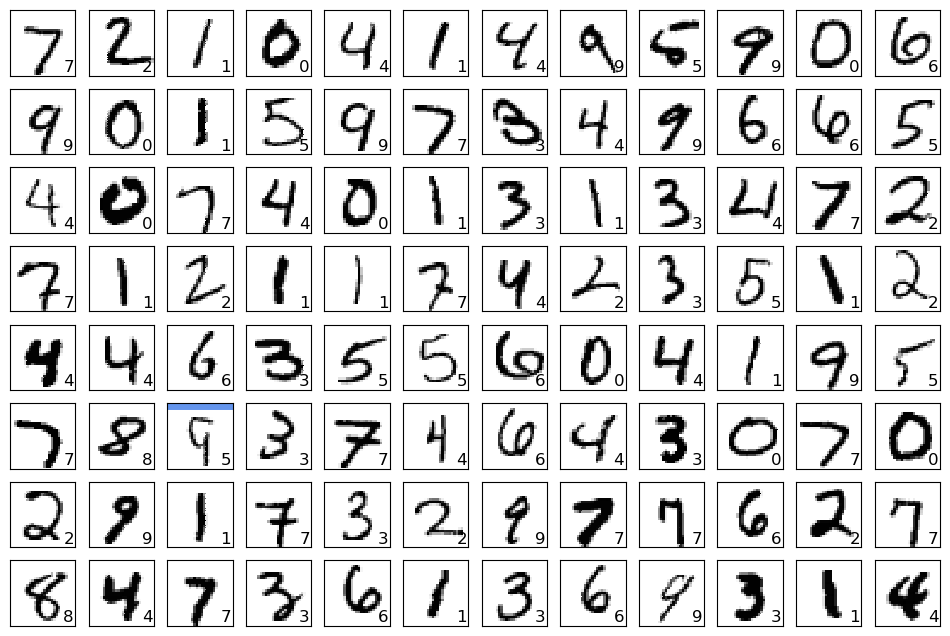

In [21]:
show_prediction()
plt.show()